In [1]:
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import ntpath
import glob

In [2]:
# Add the python path to the folder containing some useful custom packages.
import sys
sys.path.insert(0, "../../packages/")
from TsIP.TsIP import TsIP

# Ramadan

In this notebook, we create time-series regarding the ramadan. More precisely, we create time-series simply annotating if the days of a certain year are into the ramadan period or not.

In [3]:
# Define the path where the results arising from this analysis will be saved.
PATH_TO_SAVE_DATA = "./output_timeseries/"

In [4]:
# Define a list of ramadan dates.
RAMADAN_DATES = [("2017-05-26", "2017-06-24"), ("2018-05-16", "2018-06-14"), ("2019-05-5", "2019-06-3"), ("2020-04-23", "2020-05-23")]

In [5]:
# Define reference dates to build the time-series.
FIRST_YEAR = "2017"
LAST_YEAR = "2021"

In [6]:
# Read the shapefiles of each country.
path = "../Shape Files/shapefiles/"
all_folders = glob.glob(path + "*")

dfs = []

for folder in all_folders:
    country = ntpath.basename(folder).split(".")[0]
    
    if country == "Nigeria":
        boundaries = "senatorial districts"
    else:
        boundaries = "administrative level 1"
    
    all_files = glob.glob(path + country + "/" + boundaries + "/*.shp")
    for filename in all_files:
        df = gpd.read_file(filename)
        df["Country"] = country
        dfs.append(df)

In [7]:
df = pd.concat(dfs, axis = 0, ignore_index = True)
df.head()

,admin,geometry,Country
0,Boucle-Du-Mouhoun,"POLYGON ((-3.18158 13.67744, -3.18109 13.67721...",Burkina Faso
1,Cascades,"POLYGON ((-5.38923 11.00086, -5.37382 10.97698...",Burkina Faso
2,Centre,"POLYGON ((-1.60508 12.67250, -1.58739 12.67057...",Burkina Faso
3,Centre-Est,"POLYGON ((-0.30646 12.55612, -0.30573 12.55588...",Burkina Faso
4,Centre-Nord,"MULTIPOLYGON (((-0.76975 12.55062, -0.77002 12...",Burkina Faso


In [8]:
# Change the name of adminstrata feature.
df.rename(columns = {"admin": "AdminStrata"}, inplace = True)
# Delete geometry feature.
df.drop(columns = "geometry", inplace = True)
# Add a column for the ramadan feature.
df["Ramadan"] = 0
df.head()

,AdminStrata,Country,Ramadan
0,Boucle-Du-Mouhoun,Burkina Faso,0
1,Cascades,Burkina Faso,0
2,Centre,Burkina Faso,0
3,Centre-Est,Burkina Faso,0
4,Centre-Nord,Burkina Faso,0


In [9]:
# Create multi-index columns dataframe.
df = df.set_index(["Country", "AdminStrata"]).unstack().unstack().reorder_levels([2, 1, 0]).to_frame().sort_index(0).transpose().dropna(axis = 1)
df.columns.set_names("Indicator", level = 2, inplace = True)
df

Country          Burkina Faso                                          \
AdminStrata Boucle-Du-Mouhoun Cascades  Centre Centre-Est Centre-Nord   
Indicator             Ramadan  Ramadan Ramadan    Ramadan     Ramadan   
0                         0.0      0.0     0.0        0.0         0.0   

Country                                                            ...  \
AdminStrata Centre-Ouest Centre-Sud     Est Hauts-Bassins    Nord  ...   
Indicator        Ramadan    Ramadan Ramadan       Ramadan Ramadan  ...   
0                    0.0        0.0     0.0           0.0     0.0  ...   

Country       Yemen                                                          \
AdminStrata  Hajjah     Ibb    Lahj   Marib  Raymah  Sa'ada  Sana'a Shabwah   
Indicator   Ramadan Ramadan Ramadan Ramadan Ramadan Ramadan Ramadan Ramadan   
0               0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

Country                      
AdminStrata Socotra   Taizz  
Indicator   Ramadan Ramadan  
0               0.0     0.0  

[1 rows x 158 columns]

In [10]:
# Create static time-series of the ramadan (all 0 values).
new_index = pd.date_range(FIRST_YEAR, LAST_YEAR, freq = "D")
df = df.loc[df.index.repeat(len(new_index))]
df.index = new_index
df.index.name = "Datetime"
df

Country          Burkina Faso                                          \
AdminStrata Boucle-Du-Mouhoun Cascades  Centre Centre-Est Centre-Nord   
Indicator             Ramadan  Ramadan Ramadan    Ramadan     Ramadan   
Datetime                                                                
2017-01-01                0.0      0.0     0.0        0.0         0.0   
2017-01-02                0.0      0.0     0.0        0.0         0.0   
2017-01-03                0.0      0.0     0.0        0.0         0.0   
2017-01-04                0.0      0.0     0.0        0.0         0.0   
2017-01-05                0.0      0.0     0.0        0.0         0.0   
...                       ...      ...     ...        ...         ...   
2020-12-28                0.0      0.0     0.0        0.0         0.0   
2020-12-29                0.0      0.0     0.0        0.0         0.0   
2020-12-30                0.0      0.0     0.0        0.0         0.0   
2020-12-31                0.0      0.0     0.0        0.0         0.0   
2021-01-01                0.0      0.0     0.0        0.0         0.0   

Country                                                            ...  \
AdminStrata Centre-Ouest Centre-Sud     Est Hauts-Bassins    Nord  ...   
Indicator        Ramadan    Ramadan Ramadan       Ramadan Ramadan  ...   
Datetime                                                           ...   
2017-01-01           0.0        0.0     0.0           0.0     0.0  ...   
2017-01-02           0.0        0.0     0.0           0.0     0.0  ...   
2017-01-03           0.0        0.0     0.0           0.0     0.0  ...   
2017-01-04           0.0        0.0     0.0           0.0     0.0  ...   
2017-01-05           0.0        0.0     0.0           0.0     0.0  ...   
...                  ...        ...     ...           ...     ...  ...   
2020-12-28           0.0        0.0     0.0           0.0     0.0  ...   
2020-12-29           0.0        0.0     0.0           0.0     0.0  ...   
2020-12-30           0.0        0.0     0.0           0.0     0.0  ...   
2020-12-31           0.0        0.0     0.0           0.0     0.0  ...   
2021-01-01           0.0        0.0     0.0           0.0     0.0  ...   

Country       Yemen                                                          \
AdminStrata  Hajjah     Ibb    Lahj   Marib  Raymah  Sa'ada  Sana'a Shabwah   
Indicator   Ramadan Ramadan Ramadan Ramadan Ramadan Ramadan Ramadan Ramadan   
Datetime                                                                      
2017-01-01      0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2017-01-02      0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2017-01-03      0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2017-01-04      0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2017-01-05      0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
...             ...     ...     ...     ...     ...     ...     ...     ...   
2020-12-28      0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2020-12-29      0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2020-12-30      0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2020-12-31      0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2021-01-01      0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

Country                      
AdminStrata Socotra   Taizz  
Indicator   Ramadan Ramadan  
Datetime                     
2017-01-01      0.0     0.0  
2017-01-02      0.0     0.0  
2017-01-03      0.0     0.0  
2017-01-04      0.0     0.0  
2017-01-05      0.0     0.0  
...             ...     ...  
2020-12-28      0.0     0.0  
2020-12-29      0.0     0.0  
2020-12-30      0.0     0.0  
2020-12-31      0.0     0.0  
2021-01-01      0.0     0.0  

[1462 rows x 158 columns]

In [11]:
# Add the value 1 in correspondence of ramadan dates.
for ramadan_date in RAMADAN_DATES:
    df.loc[ramadan_date[0]:ramadan_date[1]] = 1

In [12]:
# Plot static time-series.
TsIP(df).interactive_plot_df(matplotlib = False, style = "lines", yaxis = "Ramadan")

interactive(children=(ToggleButtons(description='Country', options=('Burkina Faso', 'Nigeria', 'Syria', 'Yemen…

In [13]:
# Now save the time-series of each country keeping as indeces for each time-series the own first and last index.
def save(group, name):
    country = group.name
    group = group[country]
    # Adjust time-series group.
    first_idx = group.first_valid_index()
    last_idx = group.last_valid_index()
    group = group.loc[first_idx:last_idx]
    # Save.
    group.to_csv(PATH_TO_SAVE_DATA + country + "/" + name + ".csv", index_label = False)

In [14]:
# Save the dataframes.
df.groupby(level = 0, axis = 1).apply(lambda x: save(x, name = "wfp_ramadan"));

## Adjust ramadan time-series based on FCS & rCSI surveys

Now, I adjust the current data according to the data collection of the FCS & rCSI indicators. We use a sliding window of 31 days (56 days for Burkina Faso), including the reference date, summing all the ramadan days that happened during these days according to the survey data collection of the two food indicators.

In [15]:
def SvyDate_agg(group):
    country = group.name[0]
    if country == "Burkina Faso":
        return group.rolling(56).sum().dropna()
    else:
        return group.rolling(31).sum().dropna()

df_SvyWindow = df.groupby(level = [0, 1], axis = 1, group_keys = False).apply(SvyDate_agg)
df_SvyWindow.head()

Country          Burkina Faso                                          \
AdminStrata Boucle-Du-Mouhoun Cascades  Centre Centre-Est Centre-Nord   
Indicator             Ramadan  Ramadan Ramadan    Ramadan     Ramadan   
Datetime                                                                
2017-01-31                NaN      NaN     NaN        NaN         NaN   
2017-02-01                NaN      NaN     NaN        NaN         NaN   
2017-02-02                NaN      NaN     NaN        NaN         NaN   
2017-02-03                NaN      NaN     NaN        NaN         NaN   
2017-02-04                NaN      NaN     NaN        NaN         NaN   

Country                                                            ...  \
AdminStrata Centre-Ouest Centre-Sud     Est Hauts-Bassins    Nord  ...   
Indicator        Ramadan    Ramadan Ramadan       Ramadan Ramadan  ...   
Datetime                                                           ...   
2017-01-31           NaN        NaN     NaN           NaN     NaN  ...   
2017-02-01           NaN        NaN     NaN           NaN     NaN  ...   
2017-02-02           NaN        NaN     NaN           NaN     NaN  ...   
2017-02-03           NaN        NaN     NaN           NaN     NaN  ...   
2017-02-04           NaN        NaN     NaN           NaN     NaN  ...   

Country       Yemen                                                          \
AdminStrata  Hajjah     Ibb    Lahj   Marib  Raymah  Sa'ada  Sana'a Shabwah   
Indicator   Ramadan Ramadan Ramadan Ramadan Ramadan Ramadan Ramadan Ramadan   
Datetime                                                                      
2017-01-31      0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2017-02-01      0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2017-02-02      0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2017-02-03      0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2017-02-04      0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

Country                      
AdminStrata Socotra   Taizz  
Indicator   Ramadan Ramadan  
Datetime                     
2017-01-31      0.0     0.0  
2017-02-01      0.0     0.0  
2017-02-02      0.0     0.0  
2017-02-03      0.0     0.0  
2017-02-04      0.0     0.0  

[5 rows x 158 columns]

In [16]:
# Plot static time-series.
TsIP(df_SvyWindow).interactive_plot_df(matplotlib = False, style = "lines", yaxis = "Ramadan")

interactive(children=(ToggleButtons(description='Country', options=('Burkina Faso', 'Nigeria', 'Syria', 'Yemen…

In [17]:
# Save the dataframes.
df_SvyWindow.groupby(level = 0, axis = 1).apply(lambda x: save(x, name = "wfp_ramadan_SvyWindow"));

C:\Users\Pietro\Anaconda3\envs\tf_gpu\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning:

Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()



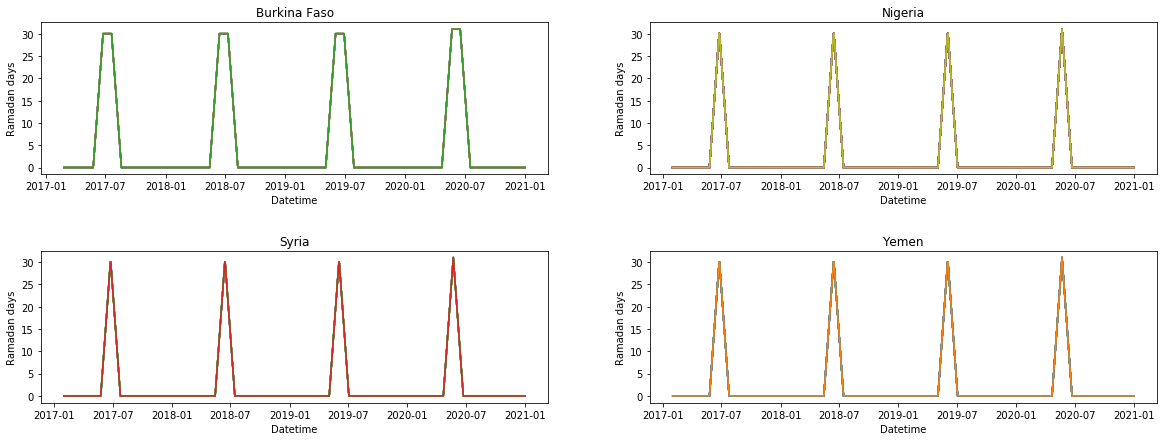

In [18]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (20, 7))
fig.subplots_adjust(hspace = .5)
ax = ax.ravel()
for i, country in enumerate(df_SvyWindow.columns.get_level_values(0).unique()):
    ax[i].plot(df_SvyWindow[country])
    ax[i].set_title(country)
    ax[i].set_xlabel("Datetime")
    ax[i].set_ylabel("Ramadan days")

In [19]:
fig.savefig(PATH_TO_SAVE_DATA + "ts.png", dpi = 100)